# **Insurance Data PhonePe**

# **Libraries Used**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Aggregated**

## **Country**

### **Load CSV**

In [2]:
df1 = pd.read_csv("dataset/insurance/aggregated_insurance_country.csv")
df1

,from_date,to_date,count,amount
0,2020-04-01,2020-06-28,185348,3.373217e+07
1,2020-07-01,2020-09-28,354284,8.949508e+07
2,2020-10-01,2020-12-28,248626,1.709799e+08
3,2021-01-01,2021-03-28,318119,2.063070e+08
4,2021-04-01,2021-06-28,363989,2.950667e+08
5,2021-07-01,2021-09-28,374867,3.424034e+08
6,2021-10-01,2021-12-28,526327,6.554319e+08
7,2022-01-01,2022-03-28,617606,8.874472e+08
8,2022-04-01,2022-06-28,630758,8.570348e+08
9,2022-07-01,2022-09-28,806491,1.054718e+09


### **Dataset Info**

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   from_date  19 non-null     object 
 1   to_date    19 non-null     object 
 2   count      19 non-null     int64  
 3   amount     19 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 736.0+ bytes


* Type Conversion needed for from_date & to_date

In [4]:
df1['from_date'] = pd.to_datetime(df1['from_date'])
df1['to_date'] = pd.to_datetime(df1['to_date'])

### **Dataset Describe**

In [5]:
df1.describe()

,from_date,to_date,count,amount
count,19,19,1.900000e+01,1.900000e+01
mean,2022-07-01 17:41:03.157894656,2022-09-27 15:09:28.421052672,7.639981e+05,1.053469e+09
min,2020-04-01 00:00:00,2020-06-28 00:00:00,1.853480e+05,3.373217e+07
25%,2021-05-16 12:00:00,2021-08-13 00:00:00,3.694280e+05,3.187350e+08
50%,2022-07-01 00:00:00,2022-09-28 00:00:00,8.064910e+05,1.054718e+09
75%,2023-08-16 00:00:00,2023-11-12 12:00:00,1.070202e+06,1.602431e+09
max,2024-10-01 00:00:00,2024-12-28 00:00:00,1.475429e+06,2.293956e+09
std,NaN,NaN,3.939161e+05,7.275009e+08


In [6]:
print(f"Total Amounts: {df1['amount'].sum()}")
print(f"Total Counts: {df1['count'].sum()}")
print(f"Amounts per Counts: {df1['amount'].sum()/df1['count'].sum()}")

Total Amounts: 20015919819.0
Total Counts: 14515964
Amounts per Counts: 1378.890152868938


### **Plots**

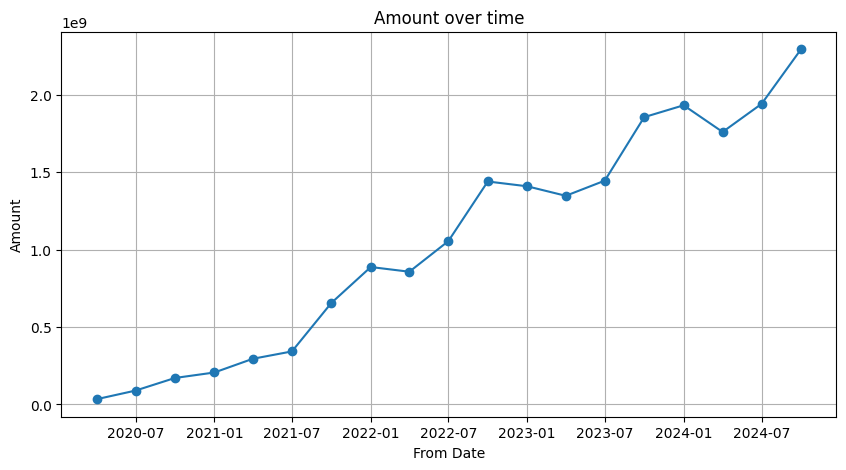

In [7]:
# Time Series
plt.figure(figsize=(10,5))
plt.plot(df1['from_date'], df1['amount'], marker='o')
plt.title("Amount over time")
plt.xlabel("From Date")
plt.ylabel("Amount")
plt.grid()
plt.show()

* This time series graph displays the aggregated transaction amounts reported quarterly over the period from 2020 to 2024. 
* The plot highlights a consistent upward trend, suggesting strong growth in these financial transactions. 

In [8]:
df1['average_transaction_amount'] = df1['amount'] / df1['count']
df1[['from_date', 'average_transaction_amount']]

,from_date,average_transaction_amount
0,2020-04-01,181.993688
1,2020-07-01,252.608292
2,2020-10-01,687.699328
3,2021-01-01,648.521541
4,2021-04-01,810.647239
5,2021-07-01,913.399558
6,2021-10-01,1245.294042
7,2022-01-01,1436.914863
8,2022-04-01,1358.737972
9,2022-07-01,1307.786285


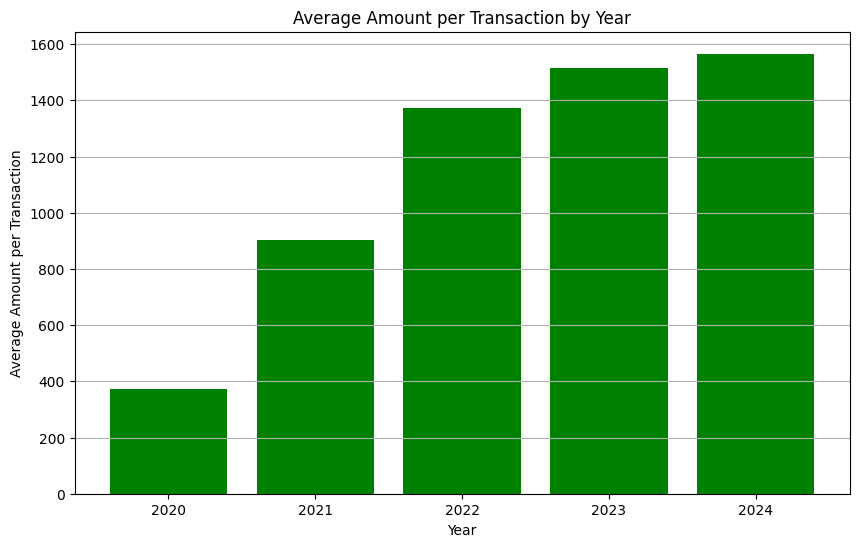

In [9]:
# Bar Plot 
df1['year'] = df1['from_date'].dt.year
yearly_avg = df1.groupby('year')['average_transaction_amount'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(yearly_avg['year'], yearly_avg['average_transaction_amount'], color='green')
plt.title("Average Amount per Transaction by Year")
plt.xlabel("Year")
plt.ylabel("Average Amount per Transaction")
plt.grid(axis='y')
plt.show()

* This bar plot shows the average amount per insurance transaction at the country level from 2020 to 2024.
* The average amount increased steadily from just below ₹400 in 2020 to nearly ₹1600 in 2024.
* This trend highlights clear growth in the value of insurance transactions over these years.

## **State**

### **Load CSV**

In [10]:
df2 = pd.read_csv("dataset/insurance/aggregated_insurance_state.csv")
df2

,from_date,to_date,count,amount,state
0,2020-04-01,2020-06-28,6,1360.0,andaman-&-nicobar-islands
1,2020-07-01,2020-09-28,41,15380.0,andaman-&-nicobar-islands
2,2020-10-01,2020-12-28,124,157975.0,andaman-&-nicobar-islands
3,2021-01-01,2021-03-28,225,244266.0,andaman-&-nicobar-islands
4,2021-04-01,2021-06-28,137,181504.0,andaman-&-nicobar-islands
...,...,...,...,...,...
677,2023-10-01,2023-12-28,72712,100365562.0,west-bengal
678,2024-01-01,2024-03-28,79576,104987909.0,west-bengal
679,2024-04-01,2024-06-28,67048,89476633.0,west-bengal
680,2024-07-01,2024-09-28,77158,107451766.0,west-bengal


### **Dataset Info**

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   from_date  682 non-null    object 
 1   to_date    682 non-null    object 
 2   count      682 non-null    int64  
 3   amount     682 non-null    float64
 4   state      682 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 26.8+ KB


* Type Conversion needed for from_date & to_date

In [12]:
df2['from_date'] = pd.to_datetime(df2['from_date'])
df2['to_date'] = pd.to_datetime(df2['to_date'])

### **Dataset Describe**

In [13]:
df2.describe()

,from_date,to_date,count,amount
count,682,682,682.000000,6.820000e+02
mean,2022-07-03 21:04:45.043988224,2022-09-29 18:32:43.636363520,21283.998534,2.934836e+07
min,2020-04-01 00:00:00,2020-06-28 00:00:00,4.000000,1.199000e+03
25%,2021-04-01 00:00:00,2021-06-28 00:00:00,607.750000,8.211475e+05
50%,2022-07-01 00:00:00,2022-09-28 00:00:00,6679.500000,6.675645e+06
75%,2023-10-01 00:00:00,2023-12-28 00:00:00,29790.500000,3.730685e+07
max,2024-10-01 00:00:00,2024-12-28 00:00:00,183532.000000,3.058618e+08
std,NaN,NaN,31503.745791,4.763085e+07


### **Plots**

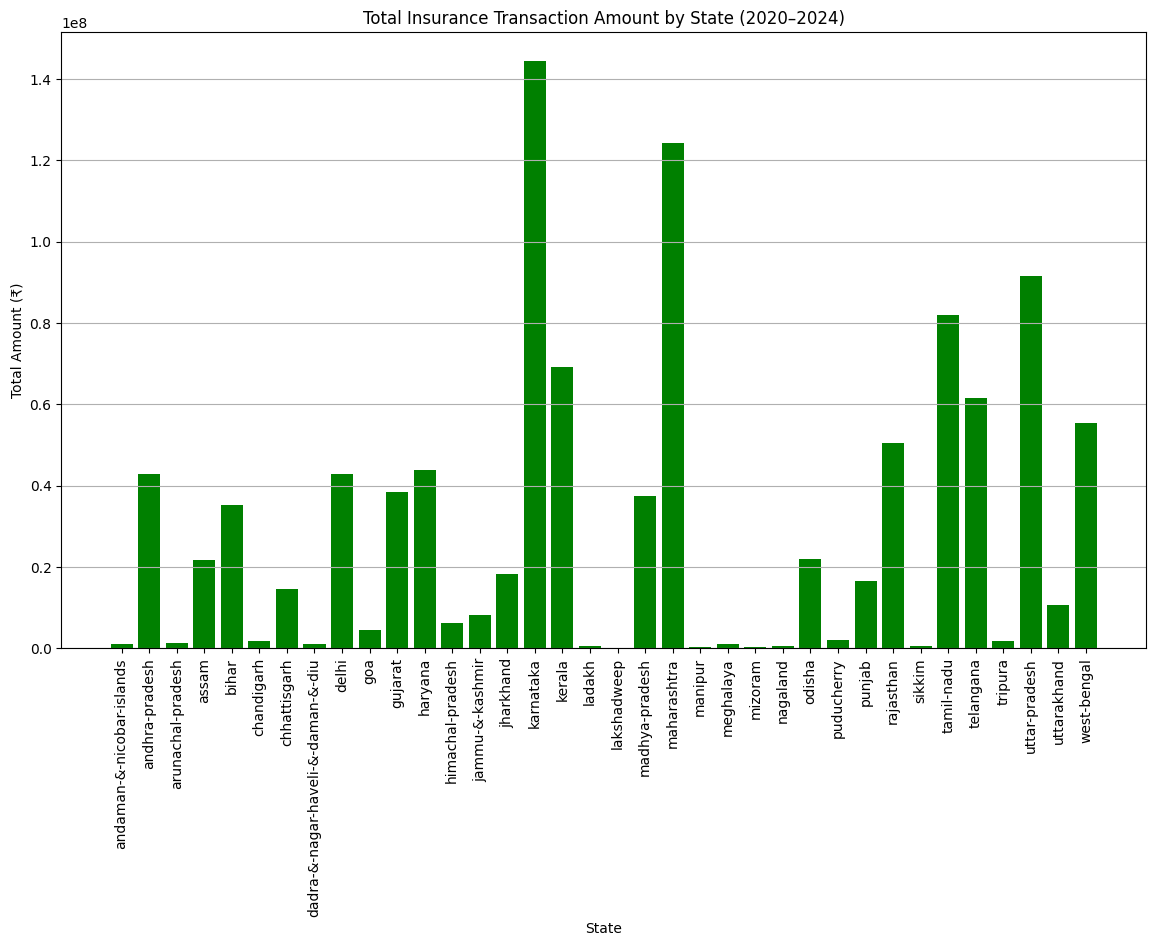

In [14]:
state_total_amount = df2.groupby('state')['amount'].mean().reset_index()

plt.figure(figsize=(14,8))
plt.bar(state_total_amount['state'], state_total_amount['amount'], color='green')
plt.xticks(rotation=90)
plt.title("Total Insurance Transaction Amount by State (2020–2024)")
plt.xlabel("State")
plt.ylabel("Total Amount (₹)")
plt.grid(axis='y')
plt.show()

 * Karnataka and Maharashtra not only had more transactions but also had higher average insurance amounts per transaction.
 * This means people there are choosing bigger insurance plans.
 * In contrast, states like Ladakh, Mizoram, and Nagaland had much smaller average amounts, almost negligible in comparison.

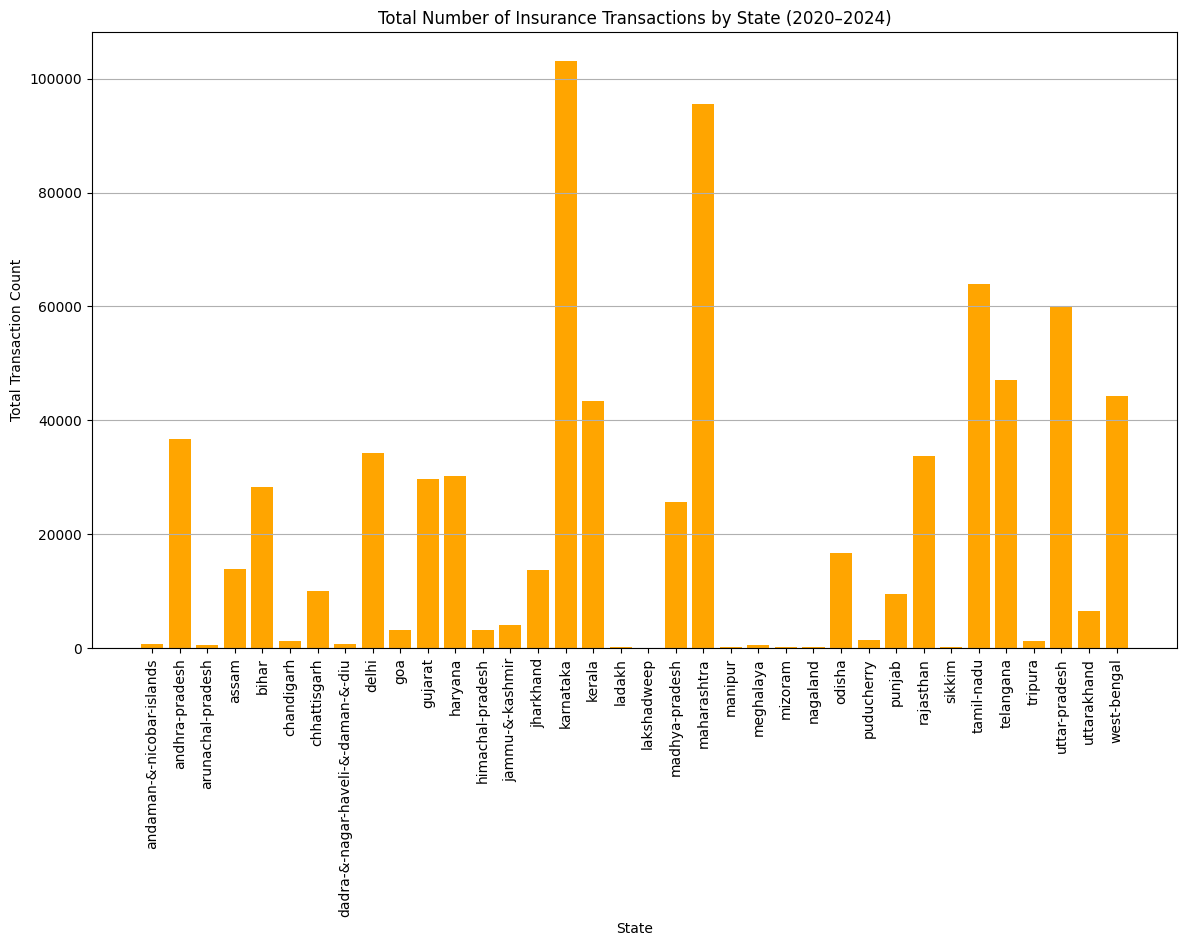

In [15]:
state_total_count = df2.groupby('state')['count'].mean().reset_index()

plt.figure(figsize=(14,8))
plt.bar(state_total_count['state'], state_total_count['count'], color='orange')
plt.xticks(rotation=90)
plt.title("Total Number of Insurance Transactions by State (2020–2024)")
plt.xlabel("State")
plt.ylabel("Total Transaction Count")
plt.grid(axis='y')
plt.show()

From above two graph we can see:
* Karnataka and Maharashtra had the highest number of insurance transactions.
* These states clearly saw more people using PhonePe for insurance.
* Tamil Nadu and Uttar Pradesh had a moderate count, while smaller states like Ladakh and Sikkim had very few — barely visible on the chart.

# **Map**

## **Country**

### **Load CSV**

In [16]:
df3 = pd.read_csv("dataset/insurance/map_insurance_hover_country.csv")
df3

,year,state,count,amount
0,2020,puducherry,112,22251.0
1,2020,tamil nadu,5473,1075552.0
2,2020,uttar pradesh,9884,1912266.0
3,2020,madhya pradesh,6283,1198701.0
4,2020,andhra pradesh,22104,3982391.0
...,...,...,...,...
677,2024,jammu & kashmir,8893,18252110.0
678,2024,goa,6662,9903374.0
679,2024,arunachal pradesh,999,2359472.0
680,2024,delhi,67962,94390728.0


### **Dataset Info**

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    682 non-null    int64  
 1   state   682 non-null    object 
 2   count   682 non-null    int64  
 3   amount  682 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 21.4+ KB


### **Dataset Describe**

In [18]:
df3.describe()

,year,count,amount
count,682.000000,682.000000,6.820000e+02
mean,2022.111437,21283.998534,2.934836e+07
std,1.370730,31503.745791,4.763085e+07
min,2020.000000,4.000000,1.199000e+03
25%,2021.000000,607.750000,8.211475e+05
50%,2022.000000,6679.500000,6.675645e+06
75%,2023.000000,29790.500000,3.730685e+07
max,2024.000000,183532.000000,3.058618e+08


### **Plots**

In [19]:
# Highest Amount
idx = df3.groupby(['year'])['amount'].idxmax()
top_states = df3.loc[idx]
top_states

,year,state,count,amount
78,2020,maharashtra,44798,27113814.0
222,2021,maharashtra,82423,93262227.0
379,2022,karnataka,133971,185063287.0
523,2023,karnataka,156076,248056311.0
667,2024,karnataka,183532,305861806.0


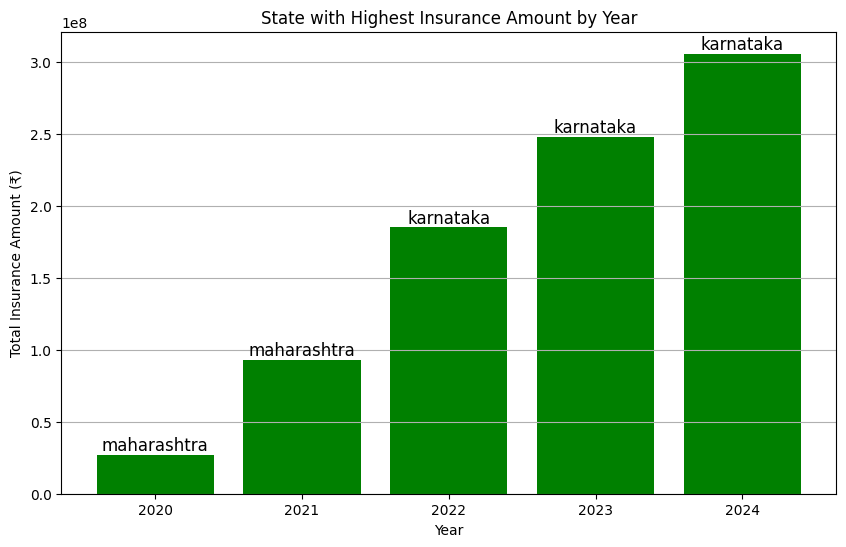

In [20]:
plt.figure(figsize=(10,6))
plt.bar(top_states['year'].astype(str), top_states['amount'], color='green')

for i, (state, amount) in enumerate(zip(top_states['state'], top_states['amount'])):
    plt.text(i, amount, state, ha='center', va='bottom', fontsize=12)

plt.title("State with Highest Insurance Amount by Year")
plt.xlabel("Year")
plt.ylabel("Total Insurance Amount (₹)")
plt.grid(axis='y')
plt.show()

* Karnataka and Maharashtra led in total insurance amount.
* Karnataka started rising in 2022 and overtook Maharashtra in the later years.

In [21]:
# Lowest Amount
idx = df3.groupby(['year'])['amount'].idxmin()
bottom_states = df3.loc[idx]
bottom_states

,year,state,count,amount
41,2020,lakshadweep,4,1199.0
112,2021,lakshadweep,4,5225.0
364,2022,lakshadweep,15,27135.0
472,2023,lakshadweep,12,12407.0
544,2024,lakshadweep,15,12935.0


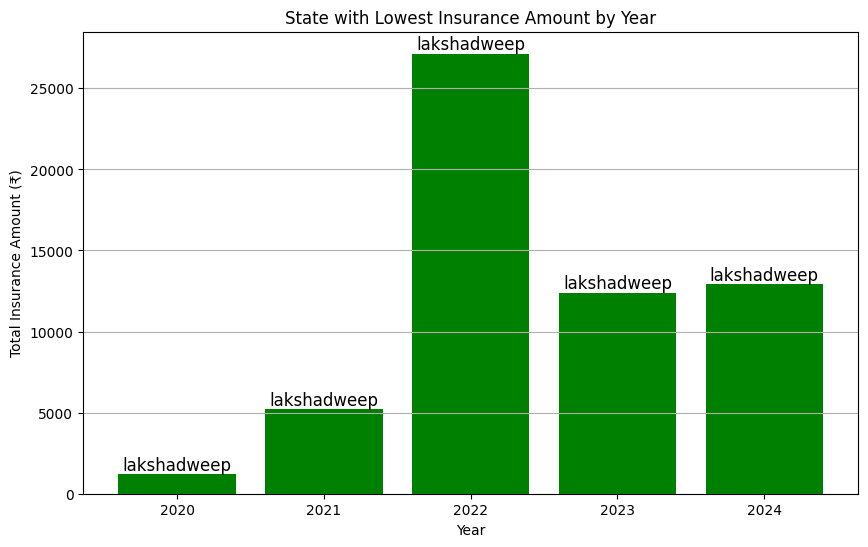

In [22]:
plt.figure(figsize=(10,6))
plt.bar(bottom_states['year'].astype(str), bottom_states['amount'], color='green')

for i, (state, amount) in enumerate(zip(bottom_states['state'], bottom_states['amount'])):
    plt.text(i, amount, state, ha='center', va='bottom', fontsize=12)

plt.title("State with Lowest Insurance Amount by Year")
plt.xlabel("Year")
plt.ylabel("Total Insurance Amount (₹)")
plt.grid(axis='y')
plt.show()

* Lakshadweep has been the last since 2020
* Its Peak is just above 25k & didn't achieve it after 2022

## **State**

### **Load CSV**

In [23]:
df4 = pd.read_csv("dataset/insurance/map_insurance_hover_state.csv")
df4

,year,state,district,count,amount
0,2020,andaman-&-nicobar-islands,south andaman district,3,795.0
1,2020,andaman-&-nicobar-islands,nicobars district,3,565.0
2,2020,andaman-&-nicobar-islands,north and middle andaman district,1,281.0
3,2020,andaman-&-nicobar-islands,south andaman district,35,13651.0
4,2020,andaman-&-nicobar-islands,nicobars district,5,1448.0
...,...,...,...,...,...
13871,2024,west-bengal,alipurduar district,1023,1613143.0
13872,2024,west-bengal,paschim bardhaman district,4945,7005851.0
13873,2024,west-bengal,nadia district,3807,5031294.0
13874,2024,west-bengal,birbhum district,1818,2423290.0


### **Dataset Info**

In [24]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13876 entries, 0 to 13875
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      13876 non-null  int64  
 1   state     13876 non-null  object 
 2   district  13876 non-null  object 
 3   count     13876 non-null  int64  
 4   amount    13876 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 542.2+ KB


### **Dataset Describe**

In [25]:
df4.describe()

,year,count,amount
count,13876.000000,13876.000000,1.387600e+04
mean,2022.133756,1046.100245,1.442460e+06
std,1.375506,3131.642623,4.503385e+06
min,2020.000000,1.000000,3.100000e+01
25%,2021.000000,113.000000,1.050938e+05
50%,2022.000000,332.000000,4.414915e+05
75%,2023.000000,909.000000,1.280078e+06
max,2024.000000,96935.000000,1.592248e+08


### **Plots**

In [26]:
# Highest Amount District
year_district_amount = df4.groupby(['year', 'district'])['amount'].sum().reset_index()

idx = year_district_amount.groupby('year')['amount'].idxmax()
top_districts = year_district_amount.loc[idx].reset_index(drop=True)

top_districts

,year,district,amount
0,2020,bengaluru urban district,26164917.0
1,2021,bengaluru urban district,113484113.0
2,2022,bengaluru urban district,322672886.0
3,2023,bengaluru urban district,445559972.0
4,2024,bengaluru urban district,584075839.0


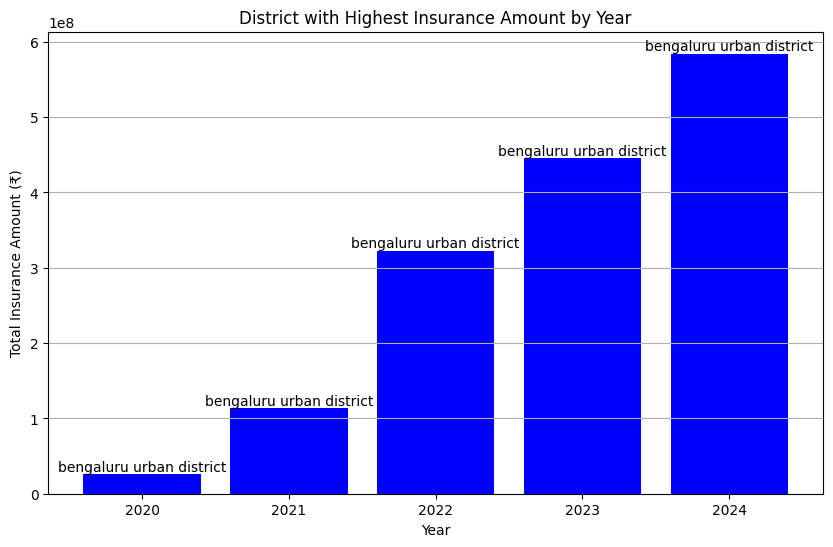

In [27]:
plt.figure(figsize=(10,6))
plt.bar(top_districts['year'].astype(str), top_districts['amount'], color='blue')

for i, (district, amount) in enumerate(zip(top_districts['district'], top_districts['amount'])):
    plt.text(i, amount, district, ha='center', va='bottom', fontsize=10)

plt.title("District with Highest Insurance Amount by Year")
plt.xlabel("Year")
plt.ylabel("Total Insurance Amount (₹)")
plt.grid(axis='y')
plt.show()

* Bengaluru Urban district held the top spot for insurance amount in every year. 
* It’s consistently the highest-performing district in insurance.

In [28]:
# Lowest Amount District
year_district_amount = df4.groupby(['year', 'district'])['amount'].sum().reset_index()

idx = year_district_amount.groupby('year')['amount'].idxmin()
bottom_districts = year_district_amount.loc[idx].reset_index(drop=True)

bottom_districts

,year,district,amount
0,2020,pherzawl district,32.0
1,2021,pherzawl district,33.0
2,2022,shi yomi district,2695.0
3,2023,kra daadi district,92.0
4,2024,pherzawl district,31.0


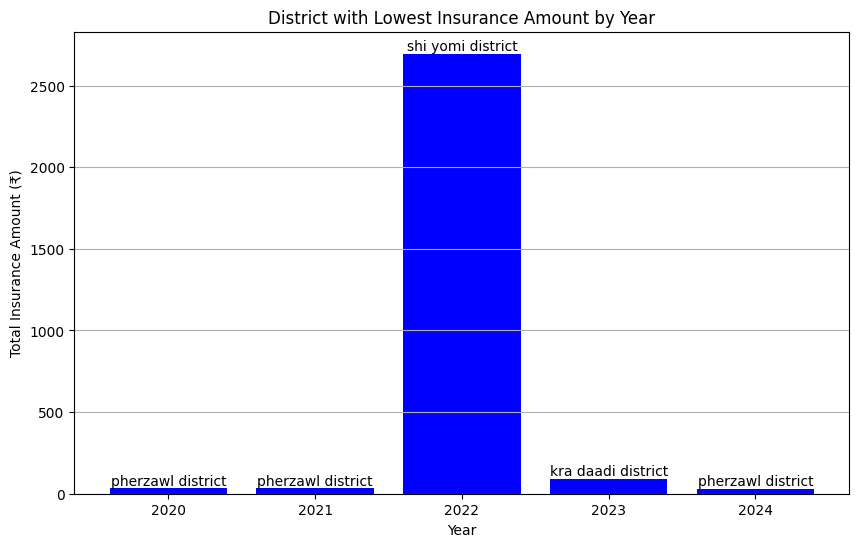

In [29]:
plt.figure(figsize=(10,6))
plt.bar(bottom_districts['year'].astype(str), bottom_districts['amount'], color='blue')

for i, (district, amount) in enumerate(zip(bottom_districts['district'], bottom_districts['amount'])):
    plt.text(i, amount, district, ha='center', va='bottom', fontsize=10)

plt.title("District with Lowest Insurance Amount by Year")
plt.xlabel("Year")
plt.ylabel("Total Insurance Amount (₹)")
plt.grid(axis='y')
plt.show()

* `Pherzawl district` is the most frequently occurring lowest amount district.
* `Shi yomi district` had a peak among lowest in 2022
* 2022 Seems to be the peak age of the lowest-amount states but not for the Highest

# **Top**

## **Country**

### **Load CSV**

In [30]:
df5 = pd.read_csv("dataset/insurance/top_insurance_country.csv")
df5

,year,level,entity_name,count,amount
0,2020,state,maharashtra,39836,6879717.0
1,2020,state,karnataka,27358,4794150.0
2,2020,state,andhra pradesh,22104,3982391.0
3,2020,state,telangana,19003,3419453.0
4,2020,state,delhi,11716,1897480.0
...,...,...,...,...,...
565,2024,pincode,500072,2743,4242713.0
566,2024,pincode,560037,2720,4500835.0
567,2024,pincode,122001,2604,3793725.0
568,2024,pincode,560066,2453,4252390.0


### **Dataset Info**

In [31]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         570 non-null    int64  
 1   level        570 non-null    object 
 2   entity_name  570 non-null    object 
 3   count        570 non-null    int64  
 4   amount       570 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.4+ KB


### **Dataset Describe**

In [32]:
df5.describe()

,year,count,amount
count,570.000000,570.000000,5.700000e+02
mean,2022.105263,25089.057895,3.343041e+07
std,1.373669,33546.104761,5.135445e+07
min,2020.000000,465.000000,9.457000e+04
25%,2021.000000,2407.500000,2.657363e+06
50%,2022.000000,11772.500000,9.881336e+06
75%,2023.000000,34902.000000,4.086023e+07
max,2024.000000,183532.000000,3.058618e+08


In [33]:
df5[df5['level']=='state']['entity_name'].value_counts()

entity_name
maharashtra       19
karnataka         19
telangana         19
uttar pradesh     19
west bengal       19
tamil nadu        17
delhi             16
andhra pradesh    13
kerala            12
rajasthan         12
haryana            8
gujarat            6
madhya pradesh     5
bihar              5
odisha             1
Name: count, dtype: int64

In [34]:
df5[df5['level']=='district']['entity_name'].value_counts()

entity_name
bengaluru urban               19
pune                          19
thane                         19
rangareddy                    19
mumbai suburban               17
medchal malkajgiri            16
chennai                       14
gurugram                      11
hyderabad                     11
jaipur                        11
visakhapatnam                  5
north twenty four parganas     5
thiruvallur                    5
nashik                         3
ernakulam                      3
kolkata                        3
ahmadabad                      2
aurangabad                     1
anantapur                      1
spsr nellore                   1
krishna                        1
prakasam                       1
coimbatore                     1
surat                          1
ahmedabad                      1
Name: count, dtype: int64

In [35]:
df5[df5['level']=='pincode']['entity_name'].value_counts()

entity_name
560068    19
500072    17
560076    16
560078    15
560037    14
201301    14
560043    14
122001    11
560100     8
411057     7
421302     7
110059     6
560058     6
560091     6
560079     3
410501     3
712138     2
421201     2
431003     2
560066     2
421301     2
535003     1
110092     1
700046     1
345021     1
411033     1
110042     1
412105     1
523002     1
122006     1
110086     1
203001     1
560064     1
560103     1
500081     1
Name: count, dtype: int64

### **Plots**

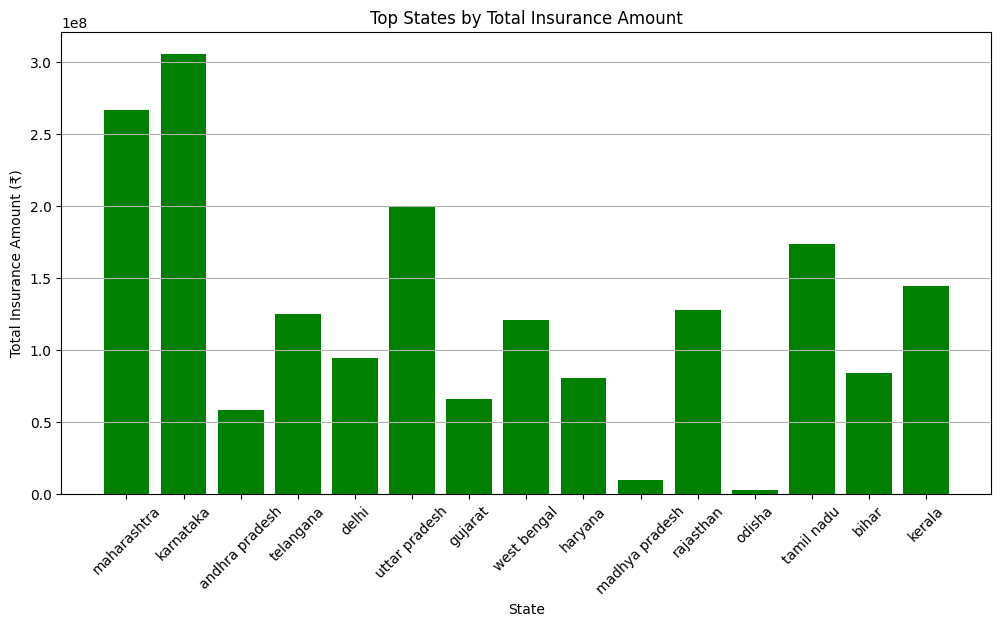

In [36]:
# filter top states
top_states = df5[df5['level'] == 'state']

plt.figure(figsize=(12,6))
plt.bar(top_states['entity_name'], top_states['amount'], color='green')
plt.xticks(rotation=45)
plt.title("Top States by Total Insurance Amount")
plt.xlabel("State")
plt.ylabel("Total Insurance Amount (₹)")
plt.grid(axis='y')
plt.show()

* Karnataka & Maharashtra are almost similar in state level.
* UP & Tamil Nadu are average. 
* The rest are below averages. 
* Odisha & Madya Pradesh are very bottom.

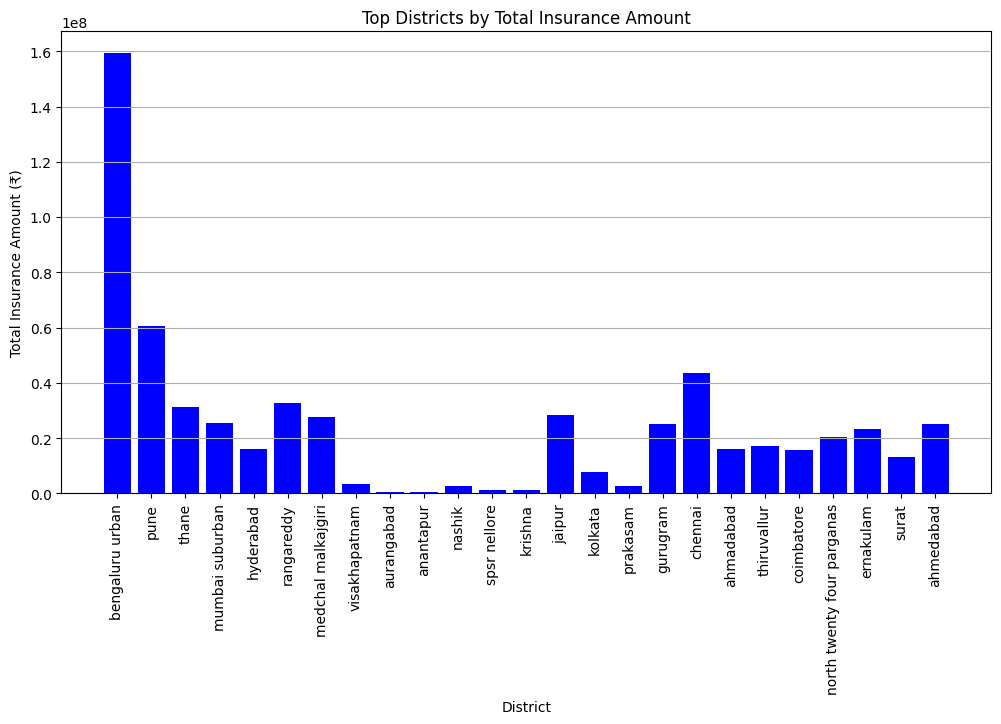

In [37]:
# filter top districts
top_districts = df5[df5['level'] == 'district']

plt.figure(figsize=(12,6))
plt.bar(top_districts['entity_name'], top_districts['amount'], color='blue')
plt.xticks(rotation=90)
plt.title("Top Districts by Total Insurance Amount")
plt.xlabel("District")
plt.ylabel("Total Insurance Amount (₹)")
plt.grid(axis='y')
plt.show()

* Bengaluru urban district has a huge lead compared to others.
* Statewise, most are similar.
* Second best is Pune, which didn't even reach half of the Bengaluru urban district. 

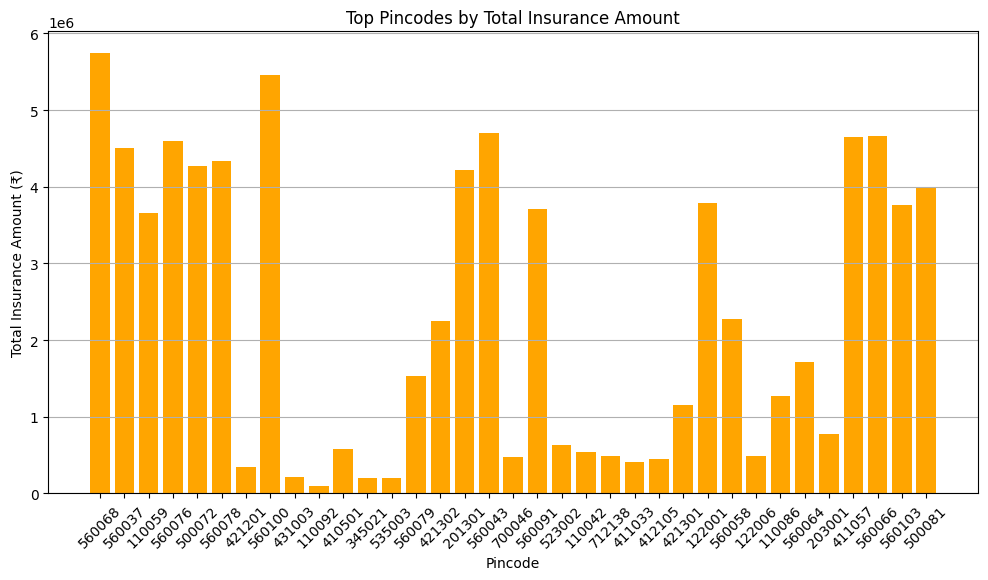

In [38]:
# filter top pincodes
top_pincodes = df5[df5['level'] == 'pincode']

plt.figure(figsize=(12,6))
plt.bar(top_pincodes['entity_name'], top_pincodes['amount'], color='orange')
plt.xticks(rotation=45)
plt.title("Top Pincodes by Total Insurance Amount")
plt.xlabel("Pincode")
plt.ylabel("Total Insurance Amount (₹)")
plt.grid(axis='y')
plt.show()

## **State**

### **Load CSV**

In [39]:
df6 = pd.read_csv("dataset/insurance/top_insurance_state.csv")
df6

,year,state,level,entity_name,count,amount
0,2020,andaman-&-nicobar-islands,district,nicobars,3,565.0
1,2020,andaman-&-nicobar-islands,district,south andaman,3,795.0
2,2020,andaman-&-nicobar-islands,pincode,744301,3,565.0
3,2020,andaman-&-nicobar-islands,pincode,744104,2,513.0
4,2020,andaman-&-nicobar-islands,pincode,744101,1,282.0
...,...,...,...,...,...,...
12271,2024,west-bengal,pincode,711101,713,750354.0
12272,2024,west-bengal,pincode,700091,642,969634.0
12273,2024,west-bengal,pincode,700150,627,761501.0
12274,2024,west-bengal,pincode,700039,619,787836.0


### **Dataset Info**

In [40]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12276 entries, 0 to 12275
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         12276 non-null  int64  
 1   state        12276 non-null  object 
 2   level        12276 non-null  object 
 3   entity_name  12273 non-null  object 
 4   count        12276 non-null  int64  
 5   amount       12276 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 575.6+ KB


### **Dataset Describe**

In [41]:
df6.describe()

,year,count,amount
count,12276.000000,12276.000000,1.227600e+04
mean,2022.117546,1090.689964,1.457266e+06
std,1.370013,3325.674106,4.781771e+06
min,2020.000000,1.000000,3.100000e+01
25%,2021.000000,50.000000,5.593375e+04
50%,2022.000000,282.000000,3.021060e+05
75%,2023.000000,968.000000,1.222880e+06
max,2024.000000,96935.000000,1.592248e+08
